In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

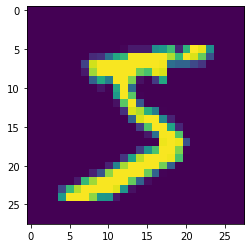

In [6]:
plt.imshow(single_image)

In [7]:
y_train[0]

5

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_example = to_categorical(y_train)

In [10]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [12]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [13]:
x_train = x_train/255

In [14]:
x_test = x_test/255

In [15]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [16]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
                metrics=['accuracy'])

2022-08-12 18:05:57.965486: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-08-12 18:05:57.990720: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2419200000 Hz
2022-08-12 18:05:57.991161: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561b4cf9c670 executing computations on platform Host. Devices:
2022-08-12 18:05:57.991179: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [22]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test),
        callbacks=[early_stop])

2022-08-12 18:05:58.379476: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 376320000 exceeds 10% of system memory.
2022-08-12 18:05:58.946827: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.1382 - accuracy: 0.9577 - val_loss: 0.0566 - val_accuracy: 0.9808
Epoch 2/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0478 - val_accuracy: 0.9840
Epoch 3/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0366 - val_accuracy: 0.9885
Epoch 4/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0406 - val_accuracy: 0.9862


In [23]:
metrics = pd.DataFrame(model.history.history)

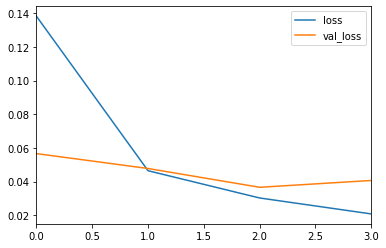

In [29]:
metrics[['loss', 'val_loss']].plot()

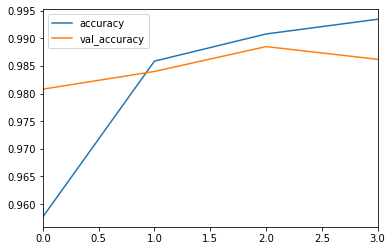

In [30]:
metrics[['accuracy', 'val_accuracy']].plot()

In [26]:
x=metrics['val_loss']

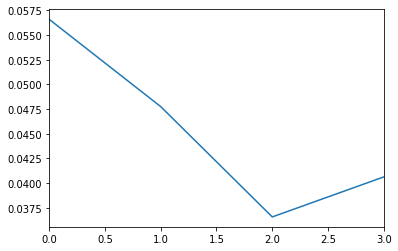

In [27]:
x.plot()

In [31]:
model.evaluate(x_test, y_cat_test, verbose=0)

2022-08-12 18:10:33.327622: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.


[0.04063900387050526, 0.9862]

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
predictions = model.predict_classes(x_test)

2022-08-12 18:11:32.253386: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 62720000 exceeds 10% of system memory.


In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
print(confusion_matrix(y_test, predictions))

[[ 975    0    1    0    0    0    2    1    1    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   1    5 1000    3    2    0    3   15    3    0]
 [   0    1    1  997    0    6    0    1    2    2]
 [   0    0    0    0  967    0    1    1    1   12]
 [   1    0    0    9    0  880    1    0    0    1]
 [   6    2    0    1    3    5  939    0    2    0]
 [   0    1    2    0    0    0    0 1018    2    5]
 [   3    1    0    2    1    2    0    2  960    3]
 [   1    1    0    2    3    5    0    4    1  992]]


In [36]:
import seaborn as sns

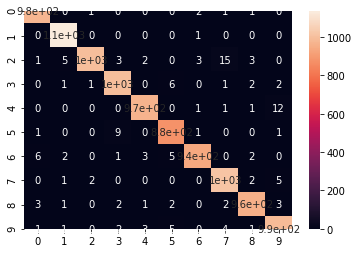

In [37]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [38]:
my_number = x_test[0]

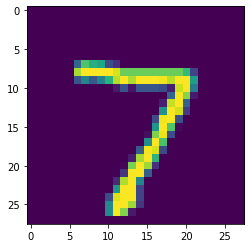

In [40]:
plt.imshow(my_number.reshape(28,28))

In [41]:
model.predict_classes(my_number.reshape(1, 28, 28, 1))

array([7])